In [0]:
#XGBoost

#XGBoost is the leading model for working with standard tabular data 
#(the type of data you store in Pandas DataFrames, as opposed to more exotic types of data like images and videos). 
#XGBoost models dominate many Kaggle competitions.

#Ideal for Classification and Regression



In [0]:
#Regression with XGBOOST

#PIMA INDIANS DATASET

In [0]:
!pip install scikit-plot

In [0]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from  sklearn.metrics import precision_recall_fscore_support

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scikitplot as skplt

In [0]:
url = 'https://raw.githubusercontent.com/aquarius31/Pima-Indians-Dataset/master/diabetes.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]

In [0]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [0]:
y = df[['Outcome']]

In [0]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [0]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
    random_state=seed)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [0]:
#Building model
model = XGBClassifier()
#n_estimators=1000, learning_rate=0.05)

In [0]:
#model = XGBClassifier(silent=False, 
                     # scale_pos_weight=1,
                      #learning_rate=0.01,  
                      #colsample_bytree = 0.4,
                      #subsample = 0.8,
                      #objective='binary:logistic', 
                      #n_estimators=1000, 
                      #reg_alpha = 0.3,
                      #max_depth=4, 
                      #gamma=10)

In [0]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
#model.fit(X_train, y_train, early_stopping_rounds=10, 
             #eval_set=[(X_test, y_test)], verbose=False)

In [0]:
y_pred = model.predict(X_test)

In [0]:
accuracy = accuracy_score(y_pred, y_test)

In [0]:
#plot.confusion_matrix(y_true, y_pred)
#plt.show()

In [0]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        90
           1       0.68      0.36      0.47        42

   micro avg       0.74      0.74      0.74       132
   macro avg       0.72      0.64      0.65       132
weighted avg       0.73      0.74      0.72       132



In [0]:
 print(cm)

[[136  26]
 [ 30  62]]


In [0]:
df.model

AttributeError: ignored

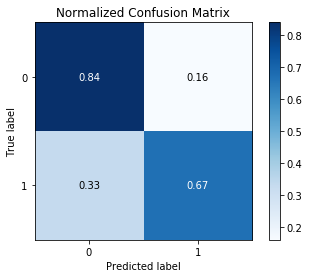

In [0]:
#!pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


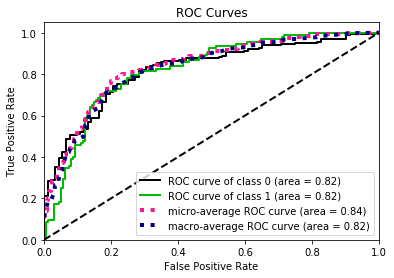

In [0]:
import scikitplot as skplt
nb = XGBClassifier()
nb = nb.fit(X_train, y_train)
y_probas = nb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

In [0]:
!pip install sklearn-evaluation

  Stored in directory: /root/.cache/pip/wheels/be/3c/51/97b3f06627b632815707e6f9dd71fa2744ef8f1ef4005ea5ed
Successfully built sklearn-evaluation


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


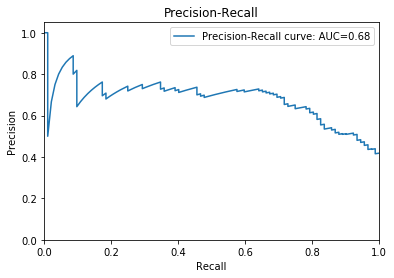

In [0]:
import matplotlib.pyplot as plt
from sklearn_evaluation import plot

import scikitplot as skplt

est = XGBClassifier()
est.fit(X_train, y_train)

y_pred = est.predict(X_test)
y_score = est.predict_proba(X_test)
y_true = y_test

plot.precision_recall(y_true, y_score)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


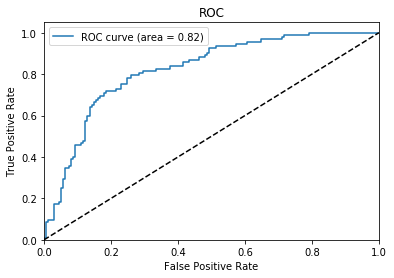

In [0]:

est = XGBClassifier()
est.fit(X_train, y_train)

y_pred = est.predict(X_test)
y_score = est.predict_proba(X_test)
y_true = y_test

plot.roc(y_true, y_score)

In [0]:

# Applying k-Fold Cross Validation
#from sklearn.model_selection import cross_val_score
#accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
#accuracies.mean()
#accuracies.std()

In [0]:
#print(accuracies)

In [0]:
#Visualize 

from xgboost import plot_tree, plot_importance, to_graphviz

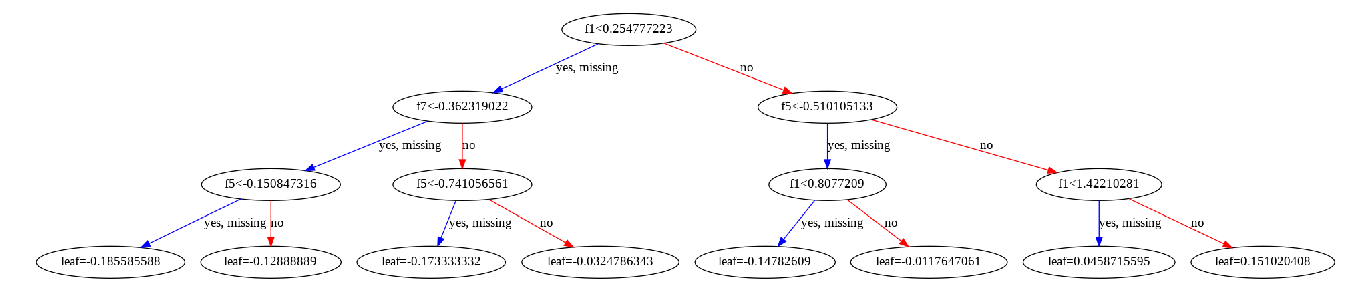

In [0]:

ax = plot_tree(model)
fig = ax.figure
fig.set_size_inches(30, 5)

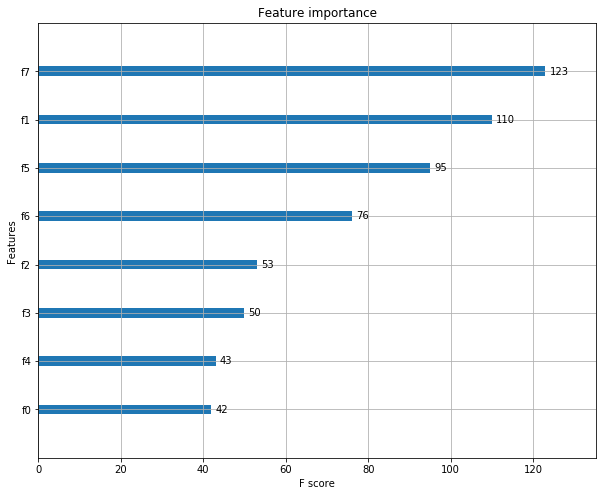

In [0]:
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 8)

In [0]:
# save model to file
import pickle
pickle.dump(model, open("pima.pickle.dat", "wb"))

In [0]:

#Social Network Ads



In [0]:
url = 'https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%203%20-%20Classification/Section%2017%20-%20Kernel%20SVM/Social_Network_Ads.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [0]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [0]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [0]:
X = df[['Gender', 'Age', 'EstimatedSalary']]

In [0]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19.0,19000.0
1,Male,35.0,20000.0
2,Female,26.0,43000.0
3,Female,27.0,57000.0
4,Male,19.0,76000.0


In [0]:
y = df[['Purchased']]

In [0]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [0]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()


X_encoded = X.apply(le.fit_transform)
print(X_encoded)

     Gender  Age  EstimatedSalary
0         1    1                4
1         1   17                5
2         0    8               26
3         0    9               39
4         1    1               57
5         1    9               40
6         0    9               65
7         0   14              116
8         1    7               17
9         0   17               47
10        0    8               61
11        0    8               35
12        1    2               67
13        1   14                3
14        1    0               63
15        1   11               61
16        1   29                9
17        1   27               10
18        1   28               12
19        0   30               13
20        1   27                7
21        0   29               32
22        1   30               24
23        0   27                7
24        1   28                8
25        1   29                5
26        1   31               12
27        0   29               14
28        1   

In [0]:
onehotencoder = OneHotEncoder(categorical_features = "all")
X = onehotencoder.fit_transform(X).toarray()


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:382: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:382: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)


In [0]:
print(X)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [0]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
    random_state=seed)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Building model
model = XGBClassifier()

In [0]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
y_pred = model.predict(X_test)

In [0]:
accuracy_score(y_pred, y_test)

0.7424242424242424

In [0]:
accuracy_score(y_pred, y_test)

0.7424242424242424